In [13]:
import numpy as np
import pandas  as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [3]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
miss_val_ind = (house_prices_df.isnull().sum().sort_values(ascending=False)/len(house_prices_df)*100).head(10).index
house_prices_df.drop(miss_val_ind[0:5],axis=1,inplace=True)
house_prices_df["LotFrontage"].fillna(house_prices_df["LotFrontage"].mean(),inplace=True)
house_prices_df.dropna(inplace=True)
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

In [5]:
obj_ind = house_prices_df.dtypes[house_prices_df.dtypes=="O"].index
for i in obj_ind:
    if house_prices_df[i].nunique()>5:
        house_prices_df.drop(i,axis=1,inplace=True)

In [6]:
obj_ind = house_prices_df.dtypes[house_prices_df.dtypes=="O"]
corr_ind = house_prices_df.corr()["SalePrice"].sort_values(ascending=False).index
house_prices_df.drop(corr_ind[11:],axis=1,inplace=True)
complet_df = pd.get_dummies(house_prices_df,drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split
X = complet_df.drop("SalePrice",axis=1)
y = complet_df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [11]:
X_cons = sm.add_constant(X_train)
results = sm.OLS(y_train, X_cons).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     109.4
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:30:17   Log-Likelihood:                -10829.
No. Observations:                 936   AIC:                         2.181e+04
Df Residuals:                     859   BIC:                         2.219e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.223e+05   1.59e+05     -3.925      0.000   -9.34e+05   -3.11e+05
OverallQual         8364.8186   1310.551      6.383      0.000    5792.562    1.09e+04
YearBuilt            176.3887     81.121      2.174      0.030      17.169     335.608
YearRemodAdd         259.8808     71.884      3.615      0.000     118.791     400.970
TotalBsmtSF           56.2628      6.198      9.078      0.000      44.098      68.427
1stFlrSF             -25.0535      6.315     -3.968      0.000     -37.447     -12.660
GrLivArea             82.8421      4.191     19.767      0.000      74.617      91.068
FullBath           -5499.8410   2599.133     -2.116      0.035   -1.06e+04    -398.446
TotRmsAbvGrd       -3273.2095   1149.882     -2.847      0.005   -5530.116   -1016.303
GarageCars          1784.8934   2999.860      0.595      0.552   -4103.019    7672.806
GarageArea            25.8092      9.968      2.589      0.010       6.245      45.373
MSZoning_FV         2.342e+04    1.7e+04      1.377      0.169   -9957.903    5.68e+04
MSZoning_RH         1.361e+04   1.94e+04      0.703      0.482   -2.44e+04    5.16e+04
MSZoning_RL         1.755e+04   1.63e+04      1.075      0.283   -1.45e+04    4.96e+04
MSZoning_RM         9668.7434   1.64e+04      0.588      0.557   -2.26e+04     4.2e+04
Street_Pave         1.141e+04   3.23e+04      0.353      0.724    -5.2e+04    7.48e+04
LotShape_IR2        7655.0169   5361.008      1.428      0.154   -2867.192    1.82e+04
LotShape_IR3         650.8620   1.14e+04      0.057      0.954   -2.17e+04     2.3e+04
LotShape_Reg       -1287.0996   2155.172     -0.597      0.551   -5517.118    2942.919
LandContour_HLS     4082.8692   7164.268      0.570      0.569   -9978.652    1.81e+04
LandContour_Low      -11.4627   8407.909     -0.001      0.999   -1.65e+04    1.65e+04
LandContour_Lvl      804.2517   5332.872      0.151      0.880   -9662.734    1.13e+04
Utilities_NoSeWa   -3.054e-10   2.17e-10     -1.408      0.159   -7.31e-10     1.2e-10
LotConfig_CulDSac   6386.3190   4182.985      1.527      0.127   -1823.749    1.46e+04
LotConfig_FR2       -1.11e+04   5579.143     -1.989      0.047    -2.2e+04    -145.427
LotConfig_FR3      -3680.9825   1.41e+04     -0.261      0.794   -3.13e+04     2.4e+04
LotConfig_Inside   -1493.0852   2421.736     -0.617      0.538   -6246.298    3260.127
LandSlope_Mod       5031.2784   5461.481      0.921      0.357   -5688.132    1.58e+04
LandSlope_Sev        353.2592   1.25e+04      0.028      0.978   -2.42e+04     2.5e+04
BldgType_2fmCon    -7375.3500   9319.684     -0.791      0.429   -2.57e+04    1.09e+04
BldgType_Duplex    -5.063e+04   7242.448     -6.991      0.000   -6.48e+04   -3.64e+04
BldgType_Twnhs     -1.495e+04   5818.061     -2.570      0.010   -2.64e+04   -3532.614
BldgType_TwnhsE    -1.097e+04   3890.5

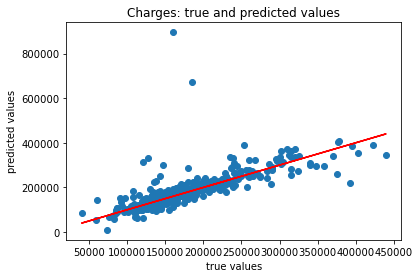

Mean absolute error of the prediction is: 25256.45255657279
Mean squared error of the prediction is: 3091400913.8357563
Root mean squared error of the prediction is: 55600.367928960295
Mean absolute percentage error of the prediction is: 15.433199576096774


In [14]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**As you can see from the above results. Our model is good to use depending on above results**

In [15]:
drop_data = ["GarageCars","MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LotConfig","LandSlope","BldgType","ExterCond","Foundation","BsmtCond","BsmtExposure","Heating","HeatingQC","Electrical","GarageFinish","GarageQual","PavedDrive"]
house_prices_df.drop(drop_data,axis=1,inplace=True)
obj_ind = house_prices_df.dtypes[house_prices_df.dtypes=="O"]
corr_ind = house_prices_df.corr()["SalePrice"].sort_values(ascending=False).index
house_prices_df.drop(corr_ind[11:],axis=1,inplace=True)
complet_df = pd.get_dummies(house_prices_df,drop_first=True)
X = complet_df.drop("SalePrice",axis=1)
y = complet_df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
X_cons = sm.add_constant(X_train)
results = sm.OLS(y_train, X_cons).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     268.4
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:35:24   Log-Likelihood:                -10943.
No. Observations:                 936   AIC:                         2.194e+04
Df Residuals:                     910   BIC:                         2.206e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.238e+05   1.39e+05     -5.204      0.000   -9.97e+05   -4.51e+05
OverallQual         1.005e+04   1328.000      7.570      0.000    7446.649    1.27e+04
YearBuilt            231.5855     64.541      3.588      0.000     104.919     358.252
YearRemodAdd         250.8070     73.811      3.398      0.001     105.947     395.667
TotalBsmtSF           53.4769      6.421      8.328      0.000      40.875      66.079
1stFlrSF             -14.1550      6.499     -2.178      0.030     -26.910      -1.400
GrLivArea             87.3720      4.335     20.155      0.000      78.864      95.880
FullBath           -9162.8427   2688.946     -3.408      0.001   -1.44e+04   -3885.585
TotRmsAbvGrd       -4868.3263   1147.393     -4.243      0.000   -7120.170   -2616.482
GarageArea            32.0490      6.902      4.643      0.000      18.502      45.596
MasVnrType_BrkFace  9537.3652   8474.078      1.125      0.261   -7093.643    2.62e+04
MasVnrType_None     1.343e+04   8360.647      1.607      0.108   -2975.379    2.98e+04
MasVnrType_Stone     1.68e+04   9088.408      1.848      0.065   -1040.148    3.46e+04
ExterQual_Fa       -5.215e+04   1.69e+04     -3.080      0.002   -8.54e+04   -1.89e+04
ExterQual_Gd       -2.977e+04   6205.102     -4.798      0.000   -4.19e+04   -1.76e+04
ExterQual_TA       -3.076e+04   6956.348     -4.423      0.000   -4.44e+04   -1.71e+04
BsmtQual_Fa        -3.308e+04   9065.473     -3.649      0.000   -5.09e+04   -1.53e+04
BsmtQual_Gd        -3.449e+04   4558.486     -7.566      0.000   -4.34e+04   -2.55e+04
BsmtQual_TA        -3.437e+04   5583.072     -6.155      0.000   -4.53e+04   -2.34e+04
CentralAir_Y        4071.7573   5471.421      0.744      0.457   -6666.313    1.48e+04
KitchenQual_Fa      -3.35e+04   9860.152     -3.398      0.001   -5.29e+04   -1.42e+04
KitchenQual_Gd     -2.954e+04   4772.532     -6.189      0.000   -3.89e+04   -2.02e+04
KitchenQual_TA     -3.594e+04   5514.780     -6.517      0.000   -4.68e+04   -2.51e+04
GarageCond_Fa      -1.854e+05   3.54e+04     -5.235      0.000   -2.55e+05   -1.16e+05
GarageCond_Gd      -1.615e+05   3.59e+04     -4.496      0.000   -2.32e+05    -9.1e+04
GarageCond_Po      -2.012e+05    3.6e+04     -5.593      0.000   -2.72e+05   -1.31e+05
GarageCond_TA      -1.757e+05   3.56e+04     -4.939      0.000   -2.46e+05   -1.06e+05
==============================================================================
Omnibus:                      211.750   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1500.720
Skew:                           0.836   Prob(JB):                         0.00
Kurtosis:                       8.973   Cond. No.                     2.53e+15
==============================================================================

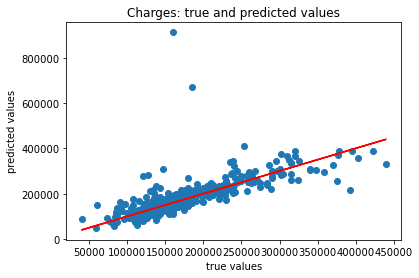

Mean absolute error of the prediction is: 26757.870588536905
Mean squared error of the prediction is: 3187079304.3346453
Root mean squared error of the prediction is: 56454.2230868041
Mean absolute percentage error of the prediction is: 16.405202121049083


In [16]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**the performance of model is decreasing  a little bit considering the above result**